<a href="https://colab.research.google.com/github/SaiRamaKrishnaa/Linear-Regression/blob/main/House_Price_Prediction_with_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

In [2]:
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/house_price_prediction.csv

--2024-07-14 09:36:23--  https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/house_price_prediction.csv
Resolving nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)... 16.12.40.26, 52.219.156.58, 16.12.36.26, ...
Connecting to nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)|16.12.40.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 319132 (312K) [text/csv]
Saving to: ‘house_price_prediction.csv’

house_price_predict 100%[===================>] 311.65K   362KB/s    in 0.9s    

2024-07-14 09:36:25 (362 KB/s) - ‘house_price_prediction.csv’ saved [319132/319132]



In [3]:
df = pd.read_csv('house_price_prediction.csv')
df

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price
0,79248.642455,6.00,6.0,3.0,40173.072174,1.505891e+06
1,61287.067179,5.87,8.0,5.0,36882.159400,1.058988e+06
2,61287.067179,5.87,8.0,5.0,36882.159400,1.058988e+06
3,63345.240046,7.19,5.0,3.0,34310.242831,1.260617e+06
4,59982.197226,5.04,7.0,4.0,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4998,60567.944140,7.83,6.0,3.0,22837.361035,1.060194e+06
4999,78491.275435,7.00,6.0,4.0,25616.115489,1.482618e+06
5000,63390.686886,7.25,4.0,2.0,33266.145490,1.030730e+06
5001,68001.331235,5.53,7.0,5.0,42625.620156,1.198657e+06


# Data Preprocessing

## Handling missing values

In [4]:
df.isna().sum()

Avg. Area Income      0
House Age             1
Number of Rooms       1
Number of Bedrooms    1
Area Population       1
Price                 2
dtype: int64

In [5]:
df = df.dropna()

## Handling duplicates

In [6]:
df[df.duplicated()]

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price
2,61287.067179,5.87,8.0,5.0,36882.159400,1.058988e+06
10,81885.927184,4.42,8.0,6.0,40149.965749,1.545155e+06
4612,58568.628460,6.53,7.0,5.0,44067.087364,1.340075e+06


In [7]:
df = df.drop_duplicates()

## Handling outliers

Identifying outliers

<Axes: >

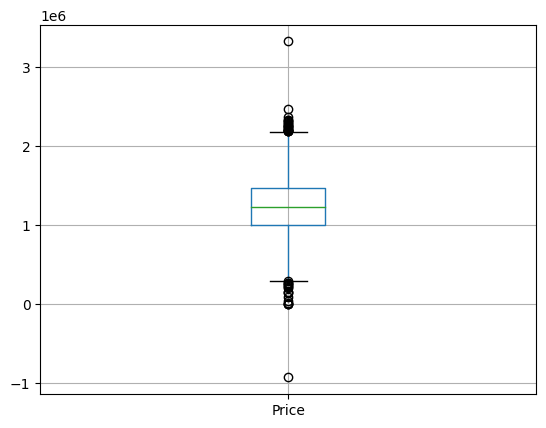

In [8]:
df.boxplot(column='Price')

In [9]:
df.loc[(df['Price'] < 5) | (df['Price'] > 3000000)]

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price
23,79545.458574,5.68,7.0,4.0,23086.800503,1.0
72,63538.346158,4.76,7.0,3.0,43282.183004,0.0
211,76326.592325,5.02,4.0,3.0,42779.831296,-933230.0
332,76056.289112,6.48,8.0,5.0,28470.701474,3323530.0


Removing outliers

In [10]:
df = df.loc[(df['Price'] > 5) & (df['Price'] < 3000000)]

##Exploratory Data Analysis


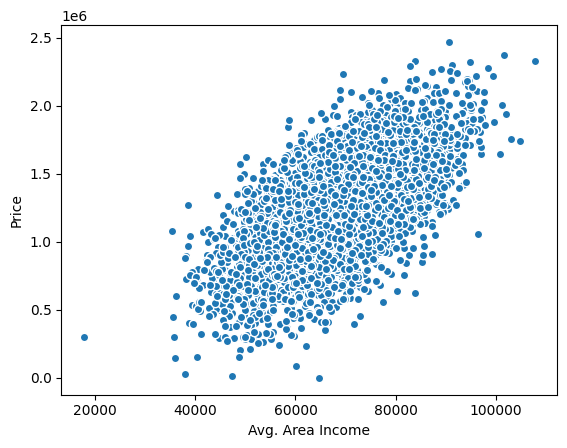

In [11]:
area_income = df['Avg. Area Income']
price = df['Price']
plt.scatter(area_income, price, edgecolor='white')
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.show()

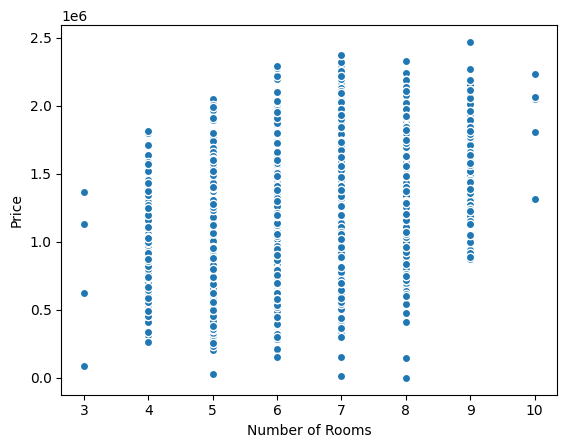

In [12]:
house_age = df['Number of Rooms']
price = df['Price']
plt.scatter(house_age, price, edgecolor='white')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.show()

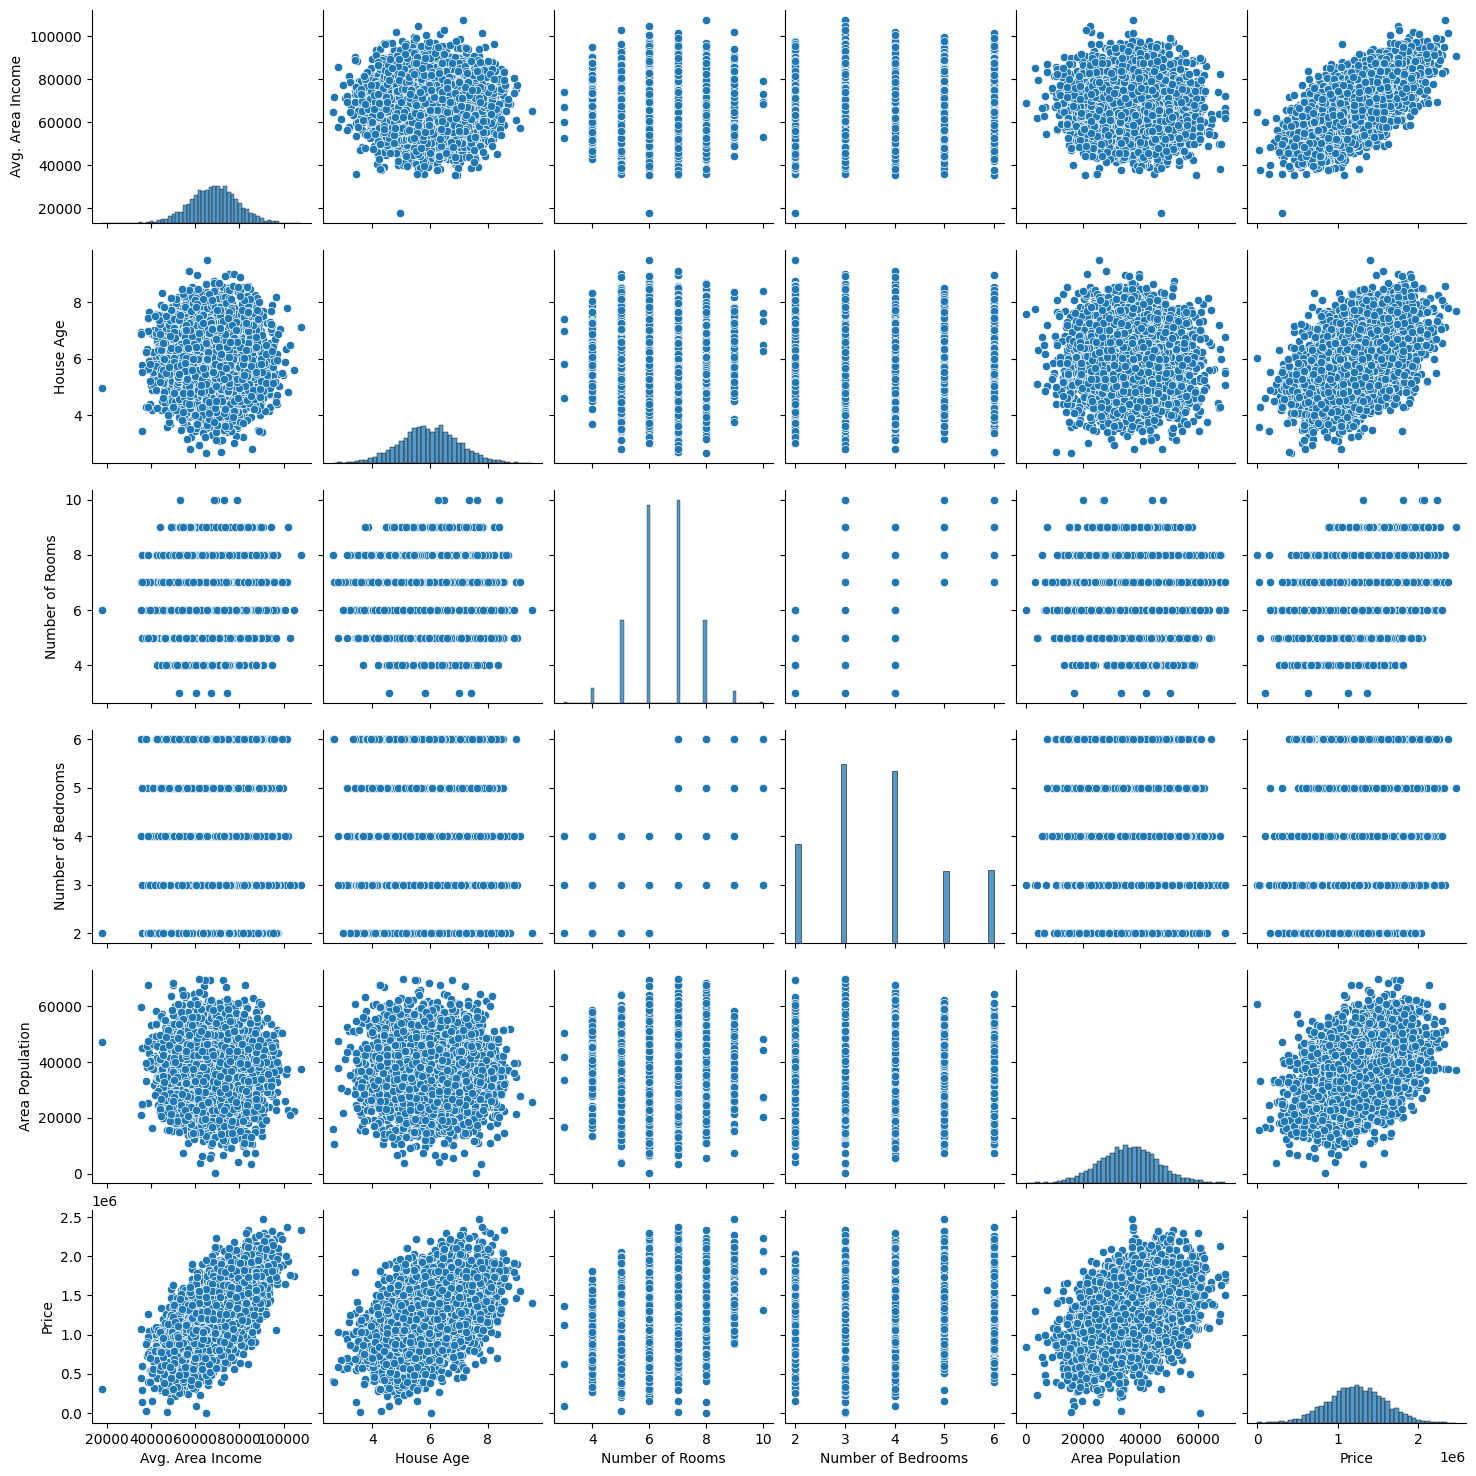

In [13]:
import seaborn as sns
sns.pairplot(df)

<Axes: >

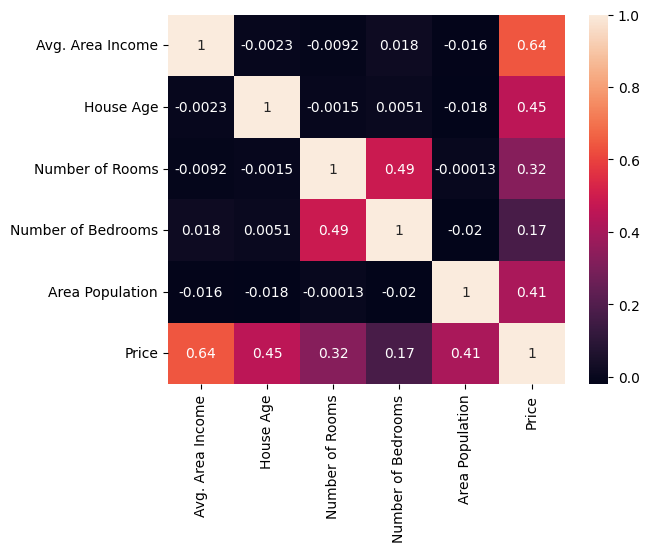

In [14]:
sns.heatmap(df.corr(), annot=True)

**Converting the preprocessed dataframe to numpy array**

In [15]:
housing_data = df.to_numpy()
housing_data

array([[7.92486425e+04, 6.00000000e+00, 6.00000000e+00, 3.00000000e+00,
        4.01730722e+04, 1.50589091e+06],
       [6.12870672e+04, 5.87000000e+00, 8.00000000e+00, 5.00000000e+00,
        3.68821594e+04, 1.05898799e+06],
       [6.33452400e+04, 7.19000000e+00, 5.00000000e+00, 3.00000000e+00,
        3.43102428e+04, 1.26061681e+06],
       ...,
       [6.33906869e+04, 7.25000000e+00, 4.00000000e+00, 2.00000000e+00,
        3.32661455e+04, 1.03072958e+06],
       [6.80013312e+04, 5.53000000e+00, 7.00000000e+00, 5.00000000e+00,
        4.26256202e+04, 1.19865687e+06],
       [6.55105818e+04, 5.99000000e+00, 6.00000000e+00, 4.00000000e+00,
        4.65012838e+04, 1.29895048e+06]])

# Linear Regression Algorithm

## Using Gradient Descent

### Cost Function

In [16]:
def compute_cost(X, Y, theta):
    # X: Feature matrix (m x n+1) where m is the number of examples and n is the number of features.
    # Y: Target values (m x 1) where m is the number of examples.
    # theta: Parameter vector (n+1 x 1) where n is the number of features.

    # Compute the hypothesis (predicted values) by performing matrix multiplication of X and theta.
    H = np.dot(X, theta)

    # Calculate the difference between the hypothesis and the actual target values.
    difference = H - Y

    # Get the number of training examples.
    m = len(X)

    # Compute the cost function J using the mean squared error formula.
    # (1/(2*m)) * sum(difference^2)
    J = (1/(2*m)) * np.dot(difference.T, difference)

    # Return the computed cost as a scalar value.
    return np.squeeze(J)


### Gradient Descent

In [17]:
def gradient_of_cost_function(X, Y, theta):
    # X: Feature matrix (m x n+1) where m is the number of examples and n is the number of features.
    # Y: Target values (m x 1) where m is the number of examples.
    # theta: Parameter vector (n+1 x 1) where n is the number of features.

    # Compute the hypothesis (predicted values) by performing matrix multiplication of X and theta.
    H = np.dot(X, theta)

    # Calculate the difference between the hypothesis and the actual target values.
    difference = H - Y

    # Get the number of training examples.
    m = len(X)

    # Compute the gradient of the cost function.
    # The gradient is the derivative of the cost function with respect to theta.
    d_theta = (1/m) * np.dot(X.T, difference)

    # Return the gradient.
    return d_theta

def gradient_descent(X, Y, theta, cost_diff_threshold, learning_rate):
    # Initialize lists to store the values of theta and the costs for each iteration.
    thetas = [theta]
    costs = [compute_cost(X, Y, theta)]

    # Initialize the cost difference to a value greater than the threshold to enter the loop.
    cost_diff = cost_diff_threshold + 1
    # Initialize the iteration counter.
    i = 0

    # Loop until the absolute cost difference is less than or equal to the threshold.
    while abs(cost_diff) > cost_diff_threshold:
        # Compute the gradient of the cost function.
        d_theta = gradient_of_cost_function(X, Y, theta)

        # Update theta by taking a step in the direction of the negative gradient.
        theta = theta - (learning_rate * d_theta)

        # Compute the cost with the updated theta and store it.
        costs.append(compute_cost(X, Y, theta))

        # Store the updated theta values.
        thetas.append(theta)

        # Compute the difference between the current and previous costs.
        cost_diff = costs[i + 1] - costs[i]

        # If the cost increases, print a message and break the loop.
        if cost_diff > 0:
            print("Diverging at iter:", i)
            break

        # Increment the iteration counter.
        i += 1

    # Return the list of theta values and the corresponding costs for each iteration.
    return thetas, costs


### Feature Scaling (Standardisation)

In [18]:
def standardize(array, array_mean=None, array_std=None):
    # array: The array to be standardized.
    # array_mean: Precomputed mean of the array (optional).
    # array_std: Precomputed standard deviation of the array (optional).

    # Compute the mean of the array if it is not provided.
    array_mean = np.mean(array, axis=0) if array_mean is None else array_mean

    # Compute the standard deviation of the array if it is not provided.
    array_std = np.std(array, axis=0) if array_std is None else array_std

    # Standardize the array by subtracting the mean and dividing by the standard deviation.
    standardized_array = (array - array_mean) / array_std

    # Return the standardized array, the mean, and the standard deviation.
    return standardized_array, array_mean, array_std

def destandardize(array, array_mean, array_std):
    # array: The standardized array to be destandardized.
    # array_mean: The mean used for standardizing the array.
    # array_std: The standard deviation used for standardizing the array.

    # Destandardize the array by multiplying by the standard deviation and adding the mean.
    return (array * array_std) + array_mean


## Using Normal Equation Method

In [20]:
def normal_equation(X, Y):
    # X: Feature matrix (m x n+1) where m is the number of examples and n is the number of features.
    # Y: Target values (m x 1) where m is the number of examples.

    # Compute the product of the transpose of X and X.
    XT_X = np.dot(X.T, X)

    # Compute the inverse of the product of X^T and X.
    inverse = np.linalg.inv(XT_X)

    # Compute the product of the transpose of X and Y.
    XT_Y = np.dot(X.T, Y)

    # Compute the result by multiplying the inverse of XT_X with XT_Y.
    result = np.dot(inverse, XT_Y)

    # Return the result, which is the parameter vector theta.
    return result


## Evaluation using MSE

In [21]:
def MSE(predicted_Y, actual_Y):
    difference = actual_Y - predicted_Y
    m = len(predicted_Y)
    mse = (1/m)*np.dot(difference.T, difference)
    return np.squeeze(mse)

# Plot Utils

Plot cost value vs iterations

In [22]:
def plot_cost_vs_iterations(x, y, theta, costs):
    fig = plt.figure()
    plt.plot(range(len(costs)), costs, c='r', alpha=0.8)
    hypothesis_cost = compute_cost(x, y, theta)
    plt.annotate('cost : {}'.format(hypothesis_cost), xy = (0.2, 0.6),
                    xycoords='axes fraction',color='#3c78d8ff', fontsize=12)
    plt.xlabel('iterations')
    plt.ylabel('cost')
    plt.show()

# Applying Linear Regression on House-Price Prediction Dataset

Splitting into Train and Test sets

In [23]:
# Set a random seed for reproducibility
np.random.seed(11235811)

# Get the number of data points in the dataset
data_count = housing_data.shape[0]

# Generate a random permutation of indices from 0 to data_count - 1
permuted_indices = np.random.permutation(data_count)

# Shuffle the dataset using the permuted indices
shuffled_data = housing_data[permuted_indices]

In [24]:
# Define the ratio for splitting the dataset into training and test sets
train_ratio = 0.8
test_ratio = 0.2

# Calculate the number of training data points
train_count = int(train_ratio * data_count)

# Split the shuffled dataset into training and test sets
training_set = shuffled_data[:train_count, :]
test_set = shuffled_data[train_count:, :]

Splitting into X and Y and reshaping

In [25]:
def prepare_X_Y(data):
    # data: Input dataset where the last column is the target variable

    # Split the dataset into features (X) and target (Y)
    split_X = data[:, :-1]
    split_Y = data[:, -1]

    # Reshape the target variable to a column vector
    Y_reshaped = split_Y.reshape(-1, 1)

    # Return the features and target variable
    return split_X, Y_reshaped

In [26]:
# Prepare the training data
train_X, train_Y = prepare_X_Y(training_set)

# Prepare the test data
test_X, test_Y = prepare_X_Y(test_set)

# Print the shapes of the training and test sets
print(train_X.shape, train_Y.shape)
print(test_X.shape, test_Y.shape)

(3992, 5) (3992, 1)
(998, 5) (998, 1)


### Using Gradient Descent

In [27]:
num_parameters = train_X.shape[1] + 1
theta = np.random.rand(num_parameters,1)
theta = theta
theta

array([[0.03159903],
       [0.12033682],
       [0.87996077],
       [0.31372637],
       [0.78477141],
       [0.66878378]])

#### Standardising Train set

- Standardising data for the cost function to converge faster, since features are of different scale in this problem.<br>Ex:
<br>$\hspace{0.5cm}$Range of Area Population: (172, 69622),
<br>$\hspace{0.5cm}$Range of No. of Rooms: (3, 10))<br>
- Predictions of a model are NOT affected by Feature Scaling.
- You can try with non-standardized data and observe that it takes longer time to converge (with $\alpha \approx 10^{-10}$).

In [29]:
# Standardize the training features (train_X) and obtain the mean and standard deviation
train_X_scaled, train_X_mean, train_X_std = standardize(train_X)

# Add a column of ones to the standardized features for the bias term
train_X_scaled = np.insert(train_X_scaled, 0, 1, axis=1)

# Standardize the training target values (train_Y) and obtain the mean and standard deviation
train_Y_scaled, train_Y_mean, train_Y_std = standardize(train_Y)

#### Training using GD

In [30]:
# Define the convergence threshold for the cost difference
cost_diff_threshold = 10e-15

# Define the learning rate for gradient descent
learning_rate = 0.2

# Perform gradient descent to optimize theta
thetas, costs = gradient_descent(train_X_scaled, train_Y_scaled, theta, cost_diff_threshold, learning_rate)

# Get the final theta values after gradient descent
theta_gradient_descent = thetas[-1]

# Print the final theta values
theta_gradient_descent

array([[6.53918631e-15],
       [6.54993243e-01],
       [4.63686269e-01],
       [3.32875879e-01],
       [9.29675449e-03],
       [4.29959489e-01]])

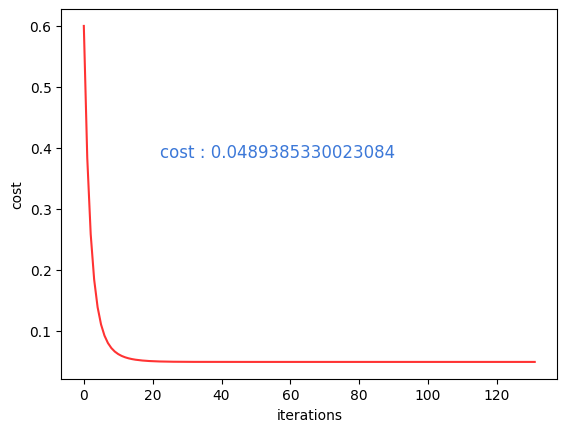

In [31]:
# Plot the cost vs. iterations to visualize convergence
plot_cost_vs_iterations(train_X_scaled, train_Y_scaled, theta_gradient_descent, costs)


#### Evaluation using Test set

##### Standardising Test set
The feature scaling used on the training data should be applied as it is on the test data.

In [32]:
# Standardize the test features using the mean and standard deviation from the training data
test_X_scaled, _, __ = standardize(test_X, train_X_mean, train_X_std)

# Add a column of ones to the standardized test features for the bias term
test_X_scaled = np.insert(test_X_scaled, 0, 1, axis=1)

##### Prediction
We need to convert the range of predicted price values to that of the actual price values, to compare and report MSE on test set.<br>Hence calling the `destandardize()` function.

In [33]:
# Predict the target values for the test set using the optimized theta values
predicted_test_Y = np.dot(test_X_scaled, theta_gradient_descent)

# De-standardize the predicted target values to bring them back to the original scale
predicted_test_Y = destandardize(predicted_test_Y, train_Y_mean, train_Y_std)

# Calculate the Mean Squared Error (MSE) for the predicted target values on the test set
mse_gradient_descent = MSE(predicted_test_Y, test_Y)

mse_gradient_descent

array(1.16455724e+10)

<b>Plotting the predicted and actual values of house prices:</b><br>
We can observe that predicted values are pretty close to the actual ones, since they pass through the line with slope 1

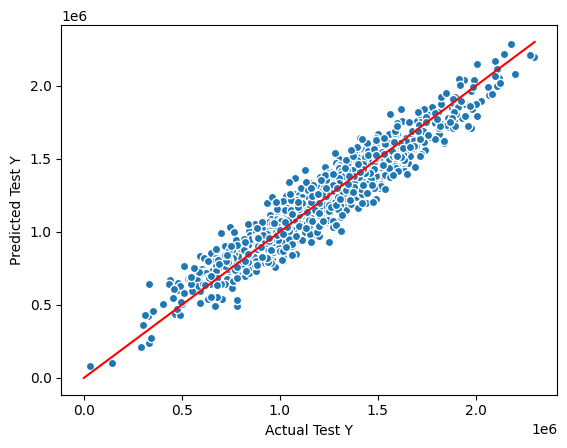

In [34]:
plt.scatter(test_Y, predicted_test_Y, edgecolor='white')
plt.xlabel('Actual Test Y')
plt.ylabel('Predicted Test Y')
plt.plot([0,2.3e6], [0,2.3e6], 'r') #for line with slope 1
plt.show()

### Using Normal Equation Method

In [35]:
train_X_with_1s = np.insert(train_X, 0, 1, axis=1)
test_X_with_1s = np.insert(test_X, 0, 1, axis=1)

In [36]:
theta_normal_eqn = normal_equation(train_X_with_1s, train_Y)
theta_normal_eqn

array([[-2.50496229e+06],
       [ 2.15059332e+01],
       [ 1.64522265e+05],
       [ 1.10664314e+05],
       [ 2.67802661e+03],
       [ 1.52051041e+01]])

#### Evaluation using Test set

In [37]:
predicted_test_Y = np.dot(test_X_with_1s, theta_normal_eqn)
mse_normal_eqn = MSE(predicted_test_Y, test_Y)
mse_normal_eqn

array(1.16455724e+10)

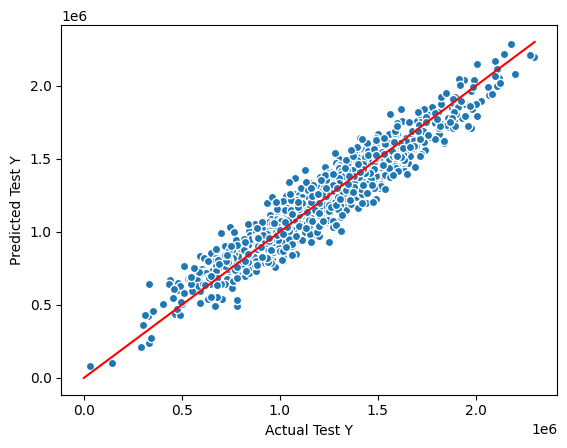

In [38]:
plt.scatter(test_Y, predicted_test_Y, edgecolor='white')
plt.xlabel('Actual Test Y')
plt.ylabel('Predicted Test Y')
plt.plot([0,2.3e6], [0,2.3e6], 'r') #for line with slope 1
plt.show()